In [ ]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [ ]:
import pandas as pd
df = pd.read_csv("/content/ft (4).csv")

In [ ]:
df

,Unnamed: 0,date,heading
0,0,"Friday, 17 March, 2023",China suspends Deloitte’s Beijing office over ...
1,1,"Friday, 17 March, 2023",German minister to visit Taiwan despite Berlin...
2,2,"Friday, 17 March, 2023",Republicans urge White House to crack down on ...
3,3,"Friday, 17 March, 2023",When Hong Kong stood still
4,4,"Friday, 17 March, 2023",Hong Kong galleries thrive despite lockdowns a...
...,...,...,...
3745,3745,"Sunday, 28 February, 2021",Chinese investors turn away from Australia aft...
3746,3746,"Sunday, 28 February, 2021",China’s vaccination programme beset by delay a...
3747,3747,"Friday, 26 February, 2021",NYSE to suspend trading of China’s Cnooc next ...
3748,3748,"Friday, 26 February, 2021",Liberals and security hawks can find common gr...


In [ ]:
df_1 = df.drop(columns=['Unnamed: 0'])


In [ ]:
print(df_1)

                           date  \
0        Friday, 17 March, 2023   
1        Friday, 17 March, 2023   
2        Friday, 17 March, 2023   
3        Friday, 17 March, 2023   
4        Friday, 17 March, 2023   
...                         ...   
3745  Sunday, 28 February, 2021   
3746  Sunday, 28 February, 2021   
3747  Friday, 26 February, 2021   
3748  Friday, 26 February, 2021   
3749  Friday, 26 February, 2021   

                                                heading  
0     China suspends Deloitte’s Beijing office over ...  
1     German minister to visit Taiwan despite Berlin...  
2     Republicans urge White House to crack down on ...  
3                            When Hong Kong stood still  
4     Hong Kong galleries thrive despite lockdowns a...  
...                                                 ...  
3745  Chinese investors turn away from Australia aft...  
3746  China’s vaccination programme beset by delay a...  
3747  NYSE to suspend trading of China’s Cnooc next ...  

In [ ]:
import numpy as np
import pandas as pd
 
 
train_data = np.array(df_1) 
train_data_list = train_data.tolist()  
print(np.array(train_data_list))

[['Friday, 17 March, 2023'
  'China suspends Deloitte’s Beijing office over Huarong audit ‘deficiencies’']
 ['Friday, 17 March, 2023'
  'German minister to visit Taiwan despite Berlin’s push for dialogue with Beijing']
 ['Friday, 17 March, 2023'
  'Republicans urge White House to crack down on Russia-China nuclear co-operation']
 ...
 ['Friday, 26 February, 2021'
  'NYSE to suspend trading of China’s Cnooc next month']
 ['Friday, 26 February, 2021'
  'Liberals and security hawks can find common green ground']
 ['Friday, 26 February, 2021'
  'Huawei takes HSBC to court in Hong Kong in Meng Wanzhou extradition row']]


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import pandas as pd

sia = SIA()
results = []
for i in train_data_list:
  i_str = str(i)  # Convert each element to a string
  pol_score = sia.polarity_scores(i_str)
  pol_score['train_data_list'] = i_str
  results.append(pol_score)

df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,train_data_list
0,0.000,1.000,0.000,0.0000,"['Friday, 17 March, 2023', 'China suspends Del..."
1,0.000,1.000,0.000,0.0000,"['Friday, 17 March, 2023', 'German minister to..."
2,0.000,1.000,0.000,0.0000,"['Friday, 17 March, 2023', 'Republicans urge W..."
3,0.000,1.000,0.000,0.0000,"['Friday, 17 March, 2023', 'When Hong Kong sto..."
4,0.000,1.000,0.000,0.0000,"['Friday, 17 March, 2023', 'Hong Kong gallerie..."
...,...,...,...,...,...
3745,0.000,1.000,0.000,0.0000,"['Sunday, 28 February, 2021', 'Chinese investo..."
3746,0.173,0.827,0.000,-0.3182,"['Sunday, 28 February, 2021', 'China’s vaccina..."
3747,0.161,0.839,0.000,-0.3182,"['Friday, 26 February, 2021', 'NYSE to suspend..."
3748,0.000,0.833,0.167,0.3400,"['Friday, 26 February, 2021', 'Liberals and se..."


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import pandas as pd
from datetime import datetime

sia = SIA()
results = []
for i in  train_data_list:
  i_str = str(i[0]) # Access the first element (which is a string)
  date_obj = datetime.strptime(i_str, '%A, %d %B, %Y')  # Parse datetime string into datetime object
  text_str = str(i[1:])  # Convert the remaining elements to a string (excluding the date)
  pol_score = sia.polarity_scores(text_str)
  pol_score['train_data_list'] = date_obj
  results.append(pol_score)

df = pd.DataFrame.from_records(results)

# Group by date and sum up the sentiment scores
df_by_date = df.groupby(df['train_data_list'].dt.date).sum()

# Print the total sentiment score for each date
print(df_by_date)

                   neg     neu    pos  compound
train_data_list                                
2021-02-26       0.223   2.546  0.231    0.0218
2021-02-28       0.512   2.297  0.190   -0.5914
2021-03-01       0.979   3.870  0.151   -1.3972
2021-03-02       1.199   4.936  0.866   -0.4503
2021-03-03       0.841   5.029  0.130   -1.2967
...                ...     ...    ...       ...
2023-03-13       0.622  11.065  0.313   -0.3843
2023-03-14       0.000   6.676  1.324    2.1914
2023-03-15       0.204   4.796  0.000   -0.3182
2023-03-16       0.247   0.753  0.000   -0.5574
2023-03-17       0.178   9.822  0.000   -0.3804

[723 rows x 4 columns]


<ipython-input-9-6118917030ae>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_date = df.groupby(df['train_data_list'].dt.date).sum()


In [ ]:
df_by_date['label'] = 0
df_by_date.loc[df_by_date['compound'] > 0, 'label'] = 1
df_by_date.loc[df_by_date['compound'] < 0, 'label'] = -1
df_by_date

,neg,neu,pos,compound,label
train_data_list,,,,,
2021-02-26,0.223,2.546,0.231,0.0218,1
2021-02-28,0.512,2.297,0.190,-0.5914,-1
2021-03-01,0.979,3.870,0.151,-1.3972,-1
2021-03-02,1.199,4.936,0.866,-0.4503,-1
2021-03-03,0.841,5.029,0.130,-1.2967,-1
...,...,...,...,...,...
2023-03-13,0.622,11.065,0.313,-0.3843,-1
2023-03-14,0.000,6.676,1.324,2.1914,1
2023-03-15,0.204,4.796,0.000,-0.3182,-1


In [ ]:
print(df_by_date.label.value_counts())
 
print(df_by_date.label.value_counts(normalize=True) * 100)

-1    430
 1    247
 0     46
Name: label, dtype: int64
-1    59.474412
 1    34.163209
 0     6.362379
Name: label, dtype: float64


In [ ]:
#设定初始值
df_by_date["new_label"]=df_by_date["label"]
df_by_date.iloc[0,5]=6000
df_by_date["cusum"]=df_by_date["new_label"].cumsum()

<ipython-input-13-d9b05e162937>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_date["cusum"].iloc[0:410] = 2*df_by_date["cusum"][410] - df_by_date["cusum"].iloc[0:410]


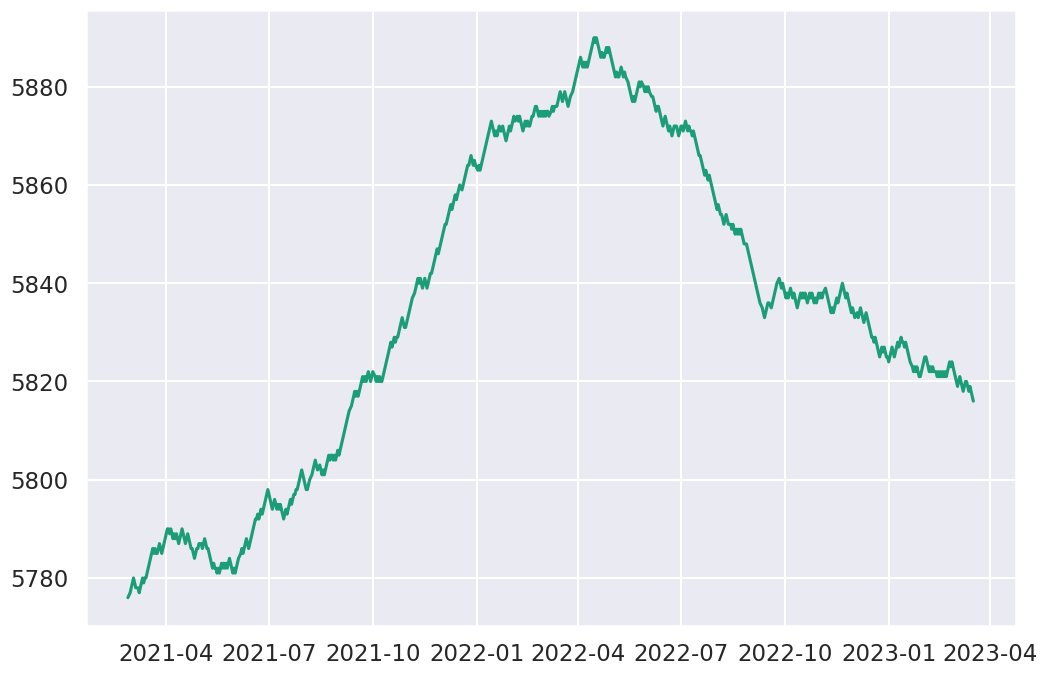

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
df_by_date["cusum"].iloc[0:410] = 2*df_by_date["cusum"][410] - df_by_date["cusum"].iloc[0:410]
plt.plot(df_by_date["cusum"])

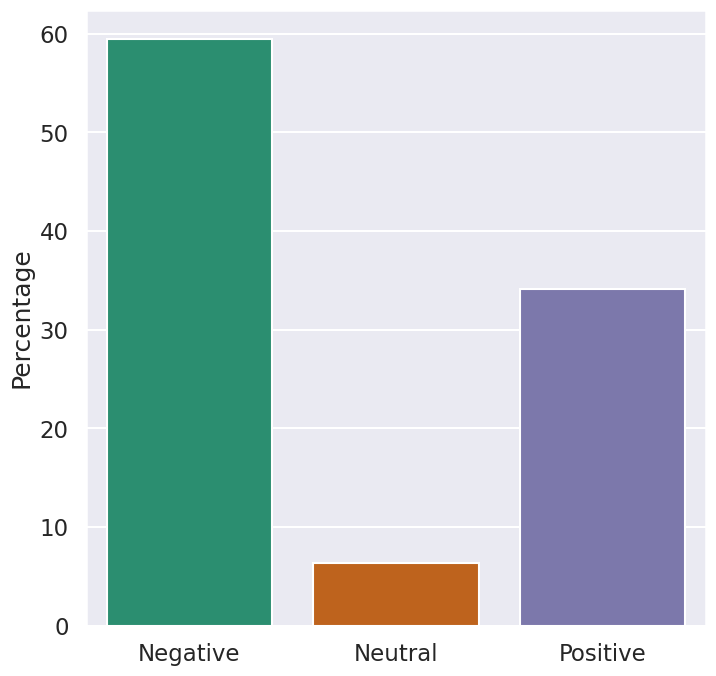

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
 
counts = df_by_date.label.value_counts(normalize=True) * 100
 
sns.barplot(x=counts.index, y=counts, ax=ax)
 
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
 
plt.show()

In [ ]:
#-*- coding:utf-8 -*-    --------------Ashare 股票行情数据双核心版( https://github.com/mpquant/Ashare ) 
import json,requests,datetime;      import pandas as pd  #

#腾讯日线
def get_price_day_tx(code, end_date='', count=10, frequency='1d'):     #日线获取  
    unit='week' if frequency in '1w' else 'month' if frequency in '1M' else 'day'     #判断日线，周线，月线
    if end_date:  end_date=end_date.strftime('%Y-%m-%d') if isinstance(end_date,datetime.date) else end_date.split(' ')[0]
    end_date='' if end_date==datetime.datetime.now().strftime('%Y-%m-%d') else end_date   #如果日期今天就变成空    
    URL=f'http://web.ifzq.gtimg.cn/appstock/app/fqkline/get?param={code},{unit},,{end_date},{count},qfq'     
    st= json.loads(requests.get(URL).content);    ms='qfq'+unit;      stk=st['data'][code]   
    buf=stk[ms] if ms in stk else stk[unit]       #指数返回不是qfqday,是day
    df=pd.DataFrame(buf,columns=['time','open','close','high','low','volume'],dtype='float')     
    df.time=pd.to_datetime(df.time);    df.set_index(['time'], inplace=True);   df.index.name=''          #处理索引 
    return df

#腾讯分钟线
def get_price_min_tx(code, end_date=None, count=10, frequency='1d'):    #分钟线获取 
    ts=int(frequency[:-1]) if frequency[:-1].isdigit() else 1           #解析K线周期数
    if end_date: end_date=end_date.strftime('%Y-%m-%d') if isinstance(end_date,datetime.date) else end_date.split(' ')[0]        
    URL=f'http://ifzq.gtimg.cn/appstock/app/kline/mkline?param={code},m{ts},,{count}' 
    st= json.loads(requests.get(URL).content);       buf=st['data'][code]['m'+str(ts)] 
    df=pd.DataFrame(buf,columns=['time','open','close','high','low','volume','n1','n2'])   
    df=df[['time','open','close','high','low','volume']]    
    df[['open','close','high','low','volume']]=df[['open','close','high','low','volume']].astype('float')
    df.time=pd.to_datetime(df.time);   df.set_index(['time'], inplace=True);   df.index.name=''          #处理索引     
    df['close'][-1]=float(st['data'][code]['qt'][code][3])                #最新基金数据是3位的
    return df


#sina新浪全周期获取函数，分钟线 5m,15m,30m,60m  日线1d=240m   周线1w=1200m  1月=7200m
def get_price_sina(code, end_date='', count=10, frequency='60m'):    #新浪全周期获取函数    
    frequency=frequency.replace('1d','240m').replace('1w','1200m').replace('1M','7200m');   mcount=count
    ts=int(frequency[:-1]) if frequency[:-1].isdigit() else 1       #解析K线周期数
    if (end_date!='') & (frequency in ['240m','1200m','7200m']): 
        end_date=pd.to_datetime(end_date) if not isinstance(end_date,datetime.date) else end_date    #转换成datetime
        unit=4 if frequency=='1200m' else 29 if frequency=='7200m' else 1    #4,29多几个数据不影响速度
        count=count+(datetime.datetime.now()-end_date).days//unit            #结束时间到今天有多少天自然日(肯定 >交易日)        
        #print(code,end_date,count)    
    URL=f'http://money.finance.sina.com.cn/quotes_service/api/json_v2.php/CN_MarketData.getKLineData?symbol={code}&scale={ts}&ma=5&datalen={count}' 
    dstr= json.loads(requests.get(URL).content);       
    #df=pd.DataFrame(dstr,columns=['day','open','high','low','close','volume'],dtype='float') 
    df= pd.DataFrame(dstr,columns=['day','open','high','low','close','volume'])
    df['open'] = df['open'].astype(float); df['high'] = df['high'].astype(float);                          #转换数据类型
    df['low'] = df['low'].astype(float);   df['close'] = df['close'].astype(float);  df['volume'] = df['volume'].astype(float)    
    df.day=pd.to_datetime(df.day);    df.set_index(['day'], inplace=True);     df.index.name=''            #处理索引                 
    if (end_date!='') & (frequency in ['240m','1200m','7200m']): return df[df.index<=end_date][-mcount:]   #日线带结束时间先返回              
    return df

def get_price(code, end_date='',count=10, frequency='1d', fields=[]):        #对外暴露只有唯一函数，这样对用户才是最友好的  
    xcode= code.replace('.XSHG','').replace('.XSHE','')                      #证券代码编码兼容处理 
    xcode='sh'+xcode if ('XSHG' in code)  else  'sz'+xcode  if ('XSHE' in code)  else code     

    if  frequency in ['1d','1w','1M']:   #1d日线  1w周线  1M月线
         try:    return get_price_sina( xcode, end_date=end_date,count=count,frequency=frequency)   #主力
         except: return get_price_day_tx(xcode,end_date=end_date,count=count,frequency=frequency)   #备用                    
    
    if  frequency in ['1m','5m','15m','30m','60m']:  #分钟线 ,1m只有腾讯接口  5分钟5m   60分钟60m
         if frequency in '1m': return get_price_min_tx(xcode,end_date=end_date,count=count,frequency=frequency)
         try:    return get_price_sina(  xcode,end_date=end_date,count=count,frequency=frequency)   #主力   
         except: return get_price_min_tx(xcode,end_date=end_date,count=count,frequency=frequency)   #备用
        
if __name__ == '__main__':    
    df=get_price('sh000001',frequency='1d',count=10)      #支持'1d'日, '1w'周, '1M'月  
    print('上证指数日线行情\n',df)
    
    df=get_price('000001.XSHG',frequency='15m',count=10)  #支持'1m','5m','15m','30m','60m'
    print('上证指数分钟线\n',df)

# Ashare 股票行情数据( https://github.com/mpquant/Ashare ) 

上证指数日线行情
                 open      high       low     close        volume
                                                                
2023-03-31  3263.406  3278.423  3260.040  3272.860  2.836137e+10
2023-04-03  3277.340  3299.732  3276.416  3296.396  3.576768e+10
2023-04-04  3297.183  3312.562  3290.993  3312.558  3.858716e+10
2023-04-06  3302.751  3314.526  3296.055  3312.628  3.271554e+10
2023-04-07  3312.481  3328.846  3308.061  3327.646  2.830322e+10
2023-04-10  3331.505  3332.715  3309.917  3315.358  3.408198e+10
2023-04-11  3317.077  3317.448  3298.250  3313.571  3.205661e+10
2023-04-12  3316.862  3330.708  3315.399  3327.182  3.430253e+10
2023-04-13  3321.273  3334.470  3309.252  3318.364  3.478621e+10
2023-04-14  3326.370  3340.076  3316.810  3338.153  3.382993e+10
上证指数分钟线
                          open      high       low     close        volume
                                                                         
2023-04-14 11:15:00  3324.597  3326.508  3322.259  33

In [ ]:
from Ashare import *

In [ ]:
df=get_price('sh000001',frequency='1d',count=1)      #默认获取今天往前5天的日线实时行情
print('上证指数日线行情\n',df)

df=get_price('000001.XSHG',frequency='1d',count=750,end_date='2021-02-06')  #可以指定结束日期，获取历史行情
print('上证指数历史行情\n',df)                        

#df=get_price('000001.XSHG',frequency='1w',count=5,end_date='2018-06-15')  #支持'1d'日, '1w'周,  '1M'月  
#print('上证指数历史周线\n',df) 

#df=get_price('sh600519',frequency='15m',count=5)     #分钟线实时行情，可用'1m','5m','15m','30m','60m'
#print('贵州茅台15分钟线\n',df)

#df=get_price('600519.XSHG',frequency='60m',count=6)  #分钟线实时行情，可用'1m','5m','15m','30m','60m'
#print('贵州茅台60分钟线\n',df)

上证指数日线行情
                open      high      low     close        volume
                                                              
2023-04-14  3326.37  3340.076  3316.81  3338.153  3.382993e+10
上证指数历史行情
                 open      high       low     close        volume
                                                                
2018-01-09  3406.112  3417.228  3403.587  3413.900  1.914886e+10
2018-01-10  3414.113  3430.214  3398.842  3421.834  2.090950e+10
2018-01-11  3415.585  3426.483  3405.639  3425.345  1.738121e+10
2018-01-12  3423.879  3435.424  3417.980  3428.941  1.740634e+10
2018-01-15  3428.951  3442.501  3402.312  3410.488  2.320093e+10
...              ...       ...       ...       ...           ...
2021-02-01  3477.172  3506.389  3469.875  3505.284  2.775679e+10
2021-02-02  3510.808  3535.502  3495.568  3533.685  2.645406e+10
2021-02-03  3531.149  3544.009  3508.507  3517.308  2.973517e+10
2021-02-04  3503.779  3524.722  3465.771  3501.859  2.988349e+10
2021-02-05 

上证指数日线行情
                 open      high       low     close        volume
                                                                
2020-04-23  2850.510  2853.636  2835.896  2838.499  2.487790e+10
2020-04-24  2834.939  2834.939  2802.499  2808.529  2.351851e+10
2020-04-27  2812.242  2832.666  2802.958  2815.495  2.101310e+10
2020-04-28  2819.991  2821.745  2758.246  2810.024  2.538727e+10
2020-04-29  2801.383  2831.764  2800.738  2822.442  2.020618e+10
...              ...       ...       ...       ...           ...
2023-04-10  3331.505  3332.715  3309.917  3315.358  3.408198e+10
2023-04-11  3317.077  3317.448  3298.250  3313.571  3.205661e+10
2023-04-12  3316.862  3330.708  3315.399  3327.182  3.430253e+10
2023-04-13  3321.273  3334.470  3309.252  3318.364  3.478621e+10
2023-04-14  3326.370  3340.076  3316.810  3338.153  3.382993e+10

[723 rows x 5 columns]


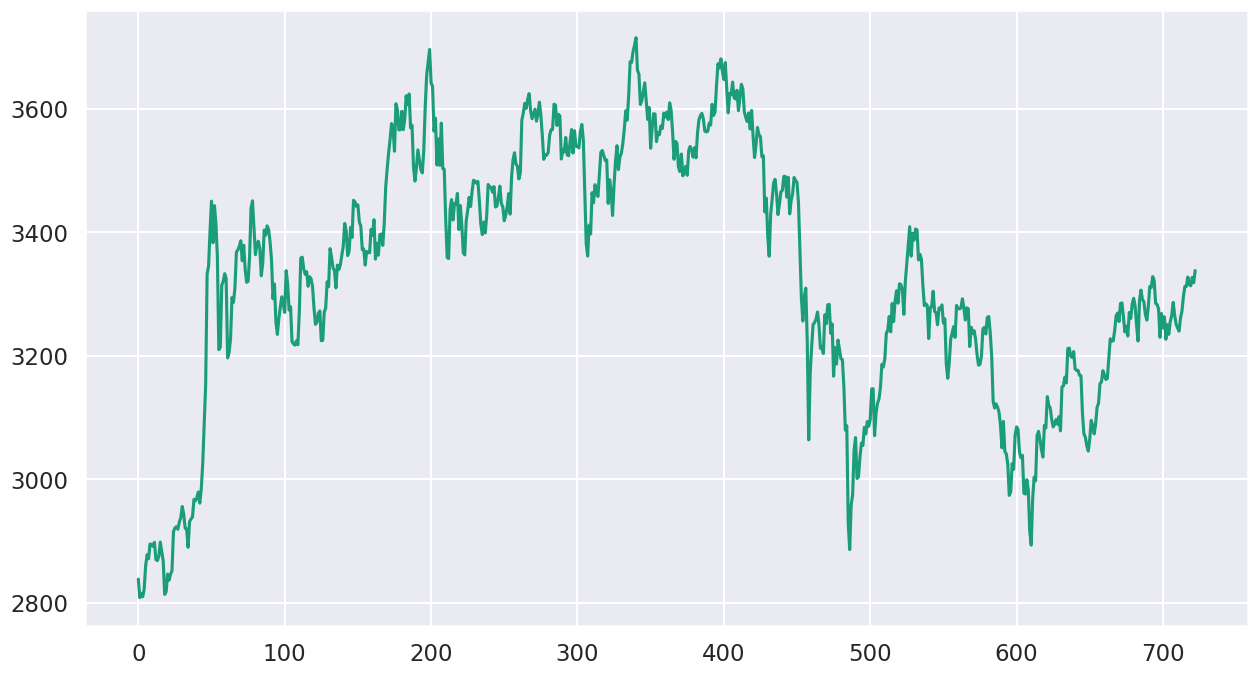

In [ ]:
#股市行情数据获取和作图 -2
from  Ashare import *          #股票数据库    https://github.com/mpquant/Ashare
from  MyTT import *            #myTT麦语言工具函数指标库  https://github.com/mpquant/MyTT
    
# 证券代码兼容多种格式 通达信，同花顺，聚宽
# sh000001 (000001.XSHG)    sz399006 (399006.XSHE)   sh600519 ( 600519.XSHG ) 

df=get_price('000001.XSHG',frequency='1d',count=723)      #获取今天往前120天的日线实时行情
print('上证指数日线行情\n',df)

#-------有数据了，下面开始正题 -------------
CLOSE=df.close.values;         OPEN=df.open.values           #基础数据定义，只要传入的是序列都可以 
HIGH=df.high.values;           LOW=df.low.values             #例如  CLOSE=list(df.close) 都是一样     

MA5=MA(CLOSE,5)                                #获取5日均线序列
#MA10=MA(CLOSE,10)                              #获取10日均线序列
#up,mid,lower=BOLL(CLOSE)                       #获取布林带指标数据

#-------------------------作图显示-----------------------------------------------------------------
import matplotlib.pyplot as plt ;  from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(15,8))  
plt.plot(CLOSE,label='SHZS');    #plt.plot(up,label='UP');           #画图显示 
#plt.plot(mid,label='MID');       plt.plot(lower,label='LOW');
#plt.plot(MA10,label='MA10',linewidth=0.5,alpha=0.7);
#plt_1.show()

In [ ]:
from scipy.stats import pearsonr
x = df_by_date["cusum"]
y = CLOSE
corr, p_value = pearsonr(x, y)

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)



Pearson correlation coefficient: 0.4340716148350883
p-value: 1.4028483428090985e-34


In [ ]:
from scipy.stats import spearmanr
x = df_by_date["cusum"]
y = CLOSE
corr, p_value = spearmanr(x, y)

print("Spearman correlation coefficient:", corr)
print("p-value:", p_value)

Spearman correlation coefficient: 0.4169112949621159
p-value: 9.043400522591816e-32


In [ ]:
# df['close'].index
str_index=df['close'].index.strftime('%Y-%m-%d')

# 将字符串索引转换为 object 类型的索引
object_index=pd.Index(str_index).astype('object').tolist()
# 查看转换后的索引
print(object_index)

['2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020

In [ ]:
# 将字符串索引转换为 object 类型的索引
object_label_index=df_by_date['label'].index.astype(str).tolist()
# 查看转换后的索引
print(object_label_index)

['2021-02-26', '2021-02-28', '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09', '2021

In [ ]:
def get_return_by_label_index(label_index, i):
  label_date = label_index

  if label_date in object_index:
    print(label_date)
    i_object_index=object_index.index(label_date)
    print('i_object_index:', i_object_index)
    prev_close=df['close'][i_object_index]  
    curr_close = df['close'][i_object_index]
    if curr_close > prev_close:
      output=1
    else:
      output=-1

  else:
    output=0  

  return output 

# 遍历访问 df_by_date["label"]
i = -1
count=0
zero_count = 0
for label_index, label_value in df_by_date['label'].iteritems():
  i+=1
  print('num:', i)
  label_index = object_label_index[i]
  print(label_index)
  print(label_value)
  return_value = get_return_by_label_index(label_index, i)
  print(f"index: {label_index}, label: {label_value}, return: {return_value}")

  if label_value == return_value:
    count+=1
  if return_value==0:
    zero_count+=1
print('postive rate:', count/(i+1-zero_count))

<ipython-input-26-f30db4a99139>:24: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label_index, label_value in df_by_date['label'].iteritems():


num: 0
2021-02-26
1
2021-02-26
i_object_index: 204
index: 2021-02-26, label: 1, return: -1
num: 1
2021-02-28
-1
index: 2021-02-28, label: -1, return: 0
num: 2
2021-03-01
-1
2021-03-01
i_object_index: 205
index: 2021-03-01, label: -1, return: -1
num: 3
2021-03-02
-1
2021-03-02
i_object_index: 206
index: 2021-03-02, label: -1, return: -1
num: 4
2021-03-03
-1
2021-03-03
i_object_index: 207
index: 2021-03-03, label: -1, return: -1
num: 5
2021-03-04
1
2021-03-04
i_object_index: 208
index: 2021-03-04, label: 1, return: -1
num: 6
2021-03-05
1
2021-03-05
i_object_index: 209
index: 2021-03-05, label: 1, return: -1
num: 7
2021-03-07
0
index: 2021-03-07, label: 0, return: 0
num: 8
2021-03-08
1
2021-03-08
i_object_index: 210
index: 2021-03-08, label: 1, return: -1
num: 9
2021-03-09
-1
2021-03-09
i_object_index: 211
index: 2021-03-09, label: -1, return: -1
num: 10
2021-03-10
-1
2021-03-10
i_object_index: 212
index: 2021-03-10, label: -1, return: -1
num: 11
2021-03-11
-1
2021-03-11
i_object_index: 2